In [1]:
from pyrosetta import *
init()
import numpy as np
import os

PyRosetta-4 2021 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python38.Release 2021.18+release.54b4909cd528ede1d749ea69e8046c244fc797f2 2021-05-04T21:04:43] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python38.Release r282 2021.18+release.54b4909 54b4909cd528ede1d749ea69e8046c244fc797f2 http://www.pyrosetta.org 2021-05-04T21:04:43
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /home/marc/anaconda3/lib/python3.8/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=721672942 seed_offset=0 real_seed=721672942 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=721672942 RG_type=mt19937


In [72]:
input_pdb = 'egfr.pdb'
pose = pose_from_pdb(input_pdb)

core.import_pose.import_pose: {0} File '1mutkinski.pdb' automatically determined to be of type PDB
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  N   in residue 725 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  CA  in residue 725 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  C   in residue 725 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  O   in residue 725 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  CB  in residue 725 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBui

core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  NH2 in residue 962 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  HB2 in residue 962 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  HB3 in residue 962 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  HG2 in residue 962 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  HG3 in residue 962 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom  HD2 in residue 962 A.  Pass flag -ignore_zero_oc

core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom HG21 in residue 994 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom HG22 in residue 994 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] PDB reader is ignoring atom HG23 in residue 994 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: {0} [ WARNING ] discarding 15 atoms at position 312 in file 1mutkinski.pdb. Best match rsd_type:  pdb_AQ4
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CG  on residue LYS 58
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CD  on residue LYS 58
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CE  on residue LYS 58
core.conformation.Conformation: {0} [ WARNING ] missing heavyat

In [73]:
sfxn = get_fa_scorefxn()
relax = rosetta.protocols.relax.FastRelax()
relax.set_scorefxn(sfxn)

core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: ref2015
core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: ref2015


In [37]:
output_dir = 'relaxed_wildtp/'

if not os.path.exists(output_dir):
    os.mkdir(output_dir)
for i in range(10):
    output_file = output_dir+input_pdb.split('.pdb')[0]+'_'+str(i+1).zfill(4)+'.pdb'
    if not os.path.exists(output_file):
        clone_pose = Pose()
        clone_pose.assign(pose)
        relax.apply(clone_pose)
        rosetta.core.io.pdb.dump_pdb(clone_pose, output_file)

In [74]:
poses = {}
for pdb in sorted(os.listdir('relaxed_wildtp')):
    index = int(pdb.split('.')[0].split('_')[-1])
    poses[index] = pose_from_pdb('relaxed_wildtp/'+pdb)

core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_

In [75]:
energies = []
for i in poses:
    energies.append(sfxn(poses[i]))

In [76]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Energy [kcal/mol]')

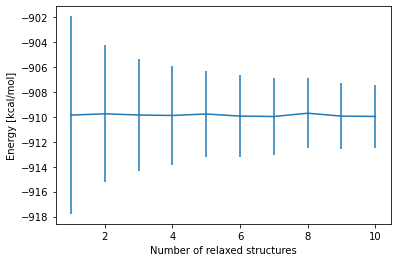

In [77]:
averages = []
repeats = 1000

Y = []
Y_err = []

for i in range(len(poses)):
    avj = []
    for j in range(repeats):
        sample = np.random.choice(energies, i+1)
        avj.append(np.average(sample))
    Y.append(np.average(avj))
    Y_err.append(np.std(avj))
    
X = [*range(1,len(poses)+1)]

plt.errorbar(X, Y, yerr=Y_err)
plt.xlabel('Number of relaxed structures')
plt.ylabel('Energy [kcal/mol]')

In [78]:
print(Y[5], Y_err[5])

-909.9486339866146 3.290088151730707


In [79]:
pose = pose_from_pdb('relaxed_wildtp/egfr_0001.pdb')

core.import_pose.import_pose: {0} File 'relaxed_1mut/1mutkinski_0001.pdb' automatically determined to be of type PDB


In [80]:
sfxn(pose)

-914.4226841594968

In [81]:
print(poses[1].energies())

 res         fa_atr         fa_rep         fa_sol   fa_intra_repfa_intra_sol_xo    lk_ball_wtd        fa_elec      pro_close    hbond_sr_bb    hbond_lr_bb    hbond_bb_sc       hbond_sc      dslf_fa13          omega         fa_dun        p_aa_pp  yhh_planarity            ref    rama_prepro
   1         -0.564          0.070          0.676          0.036          0.000         -0.149         -0.095          0.000          0.000          0.000          0.000          0.000          0.000          0.365          0.000          0.000          0.000          0.798          0.000
   2         -2.505          0.284          2.781          1.226          0.252         -0.425         -2.178          0.000          0.000          0.000         -0.586          0.000          0.000          0.023          3.779         -0.072          0.000         -2.725          0.009
   3         -1.106          0.881          0.924          0.253          0.000         -0.102         -0.020          0.017      

In [83]:
def getResidueEnergy(pose, residue_index):
    
    energies = pose.energies()
    energies = energies.residue_total_energies(residue_index)
    
    residue_energy = 0
    for s in sfxn.get_nonzero_weighted_scoretypes():
        residue_energy += energies.get(s)
        
    return residue_energy

In [84]:
diff = []
for i in range(1,pose.total_residue()+1):
    
    energy = getResidueEnergy(pose, i)
    energy_m = getResidueEnergy(poses[1], i)
    
    diff.append((i, energy_m-energy))

In [ ]:
for x in sorted(diff, key=lambda x:x[1]):
    print(x)
    #pose[x[0]]

In [51]:
print(pose.pdb_info())

PDB file name: relaxed_wildtp/egfr_0001.pdb
 Pose Range  Chain    PDB Range  |   #Residues         #Atoms

0001 -- 0053    A 0672  -- 0724  |   0053 residues;    00871 atoms
0054 -- 0283    A 0726  -- 0955  |   0230 residues;    03729 atoms
0284 -- 0284    A 0961  -- 0961  |   0001 residues;    00018 atoms
0285 -- 0285    A 0999  -- 0999  |   0001 residues;    00052 atoms
                           TOTAL |   0285 residues;    04670 atoms

